In [14]:
#import some necessary librairies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from subprocess import check_output

In [15]:
train=pd.read_csv('/Users/Summer/Documents/Kaggle/train.csv')
test=pd.read_csv('/Users/Summer/Documents/Kaggle/test.csv')
Priceorigin=train["SalePrice"]
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

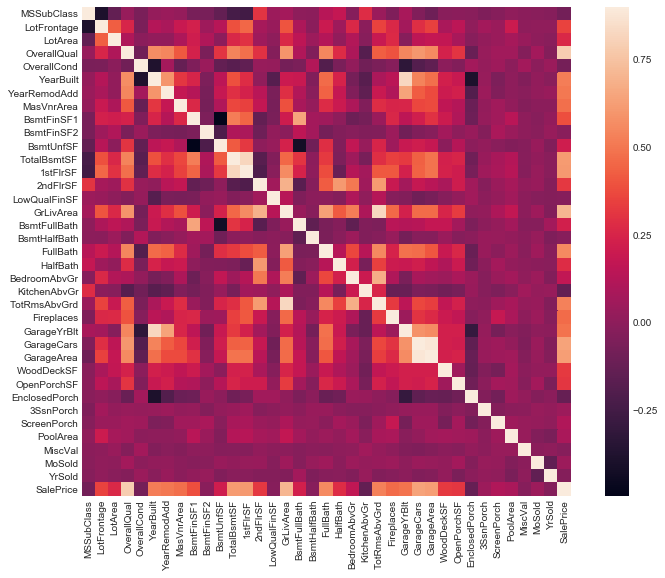

In [17]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [20]:
for i in range(0,37):
    if corrmat.SalePrice[i]>0.5:
        print(corrmat.index[i])

OverallQual
YearBuilt
YearRemodAdd
TotalBsmtSF
1stFlrSF
GrLivArea
FullBath
TotRmsAbvGrd
GarageCars
GarageArea
SalePrice


In [ ]:
#Deleting outliers
train = train.drop(train[(train['TotalBsmtSF']>5000) & (train['SalePrice']<200000)].index)

#Deleting outliers
train = train.drop(train[(train['1stFlrSF']>3000) & (train['SalePrice']<200000)].index)

#Deleting outliers
train = train.drop(train[(train['TotRmsAbvGrd']>13) & (train['SalePrice']<300000)].index)

#Deleting outliers
train = train.drop(train[(train['OverallQual']>9) & (train['SalePrice']<200000)].index)

#Deleting outliers
train = train.drop(train[(train['GarageArea']>1200) & (train['SalePrice']<300000)].index)


 mu = 12.02 and sigma = 0.40



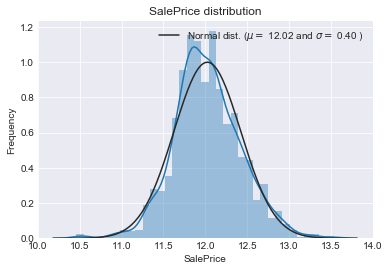

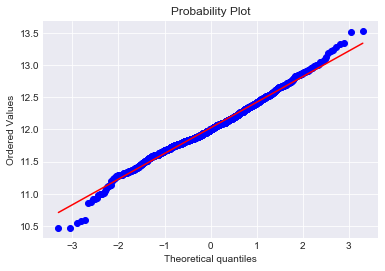

In [4]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [5]:
Price=train["SalePrice"]

In [6]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data.drop("Id", axis = 1, inplace = True);
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2913, 79)


In [7]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})

Text(0.5,1,'Percent missing data by feature')

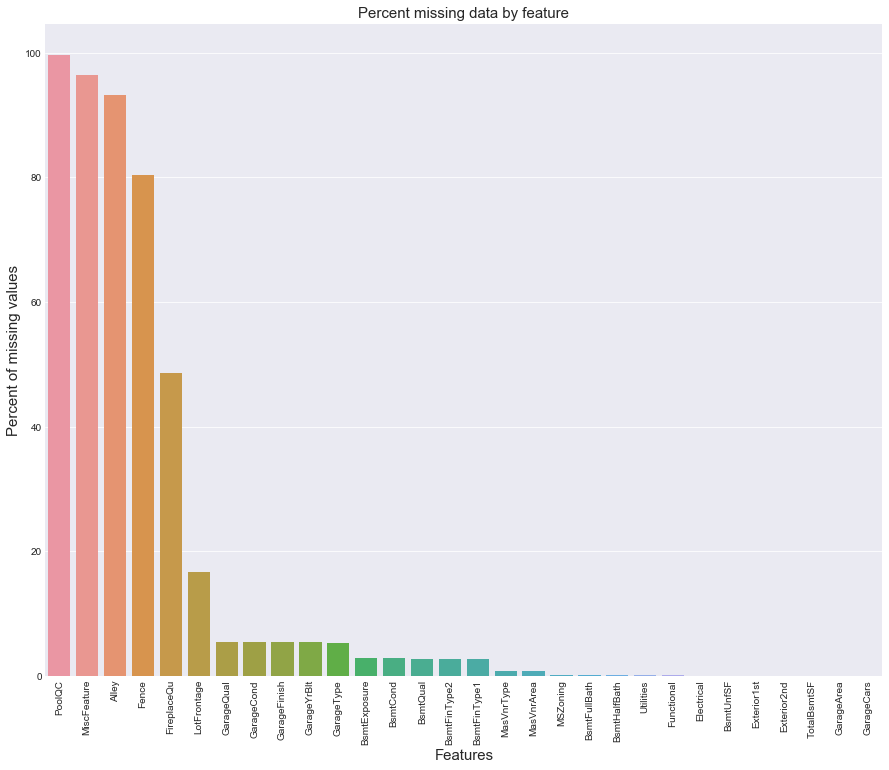

In [8]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [9]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [10]:
#categorical attributes that NA has no meaning
for col2 in ('MSZoning', 'Utilities', 'Functional', 'Electrical', 'Exterior1st', 'Exterior2nd', 'SaleType', 'KitchenQual'):
    all_data[col2] = all_data[col2].fillna(all_data[col2].mode()[0])

In [11]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [12]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [13]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [14]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [ ]:
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [15]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [16]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [17]:
def transform(X):
    #地下室总面积+1 2 层面积
    X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
    #地下室总面积+1 2 层面积 + 车库+ 泳池
    X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["PoolArea"]
            
    X["+_GrLivArea_OverallQual"] = X["GrLivArea"] * X["OverallQual"]
    X["+_BsmtFinSF1_OverallQual"] = X["BsmtFinSF1"] * X["OverallQual"]
            
    #X["-_Functional_TotalHouse"] = float(X["Functional"]) *float( X["TotalHouse"])
    #X["-_Functional_OverallQual"] = X["Functional"] + X["OverallQual"]
    X["-_LotArea_OverallQual"] = X["LotArea"] * X["OverallQual"]
    X["-_TotalHouse_LotArea"] = X["TotalHouse"] + X["LotArea"]
    #X["-_Condition1_TotalHouse"] = float(X["oCondition1"]) * float(X["TotalHouse"])
    #X["-_Condition1_OverallQual"] = X["oCondition1"] + X["OverallQual"]
            
    #地下室已完工+未完工
    #X["Bsmt"] = X["BsmtFinSF1"] + X["BsmtFinSF2"] + X["BsmtUnfSF"]
    #地上总房间数
    X["Rooms"] = X["FullBath"]+X["TotRmsAbvGrd"] + X["HalfBath"]
    #总门廊面积
    X["PorchArea"] = X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]
    #X["TotalArea"]+X["PorchArea"] 
    #总的所有面积
    X["TotalPlace"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["PoolArea"] + X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]
    #总卫生间数
    X["TotalBaths"] = X["BsmtFullBath"] + X["BsmtHalfBath"] + X["FullBath"] +X["HalfBath"]
    #已完工高质量面积
    X["FinishedHQArea"] = X["BsmtFinSF1"] + X["BsmtFinSF2"] - X["LowQualFinSF"]
    #设施面积
    X["FacilityArea"]=X["GarageArea"] + X["PoolArea"]
    #地下总房间数
    X["BaseTotalRoom"]= X["BsmtFullBath"] + X["BsmtHalfBath"]
    return X

In [40]:
X=transform(all_data)
X.shape

(2913, 92)

In [19]:
categoricals = train.select_dtypes(exclude=[np.number])
#categoricals.describe()
cate_columns = categoricals.columns.tolist()
print(cate_columns)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [20]:
#all_data = pd.get_dummies(categoricals)
#for i in cate_columns:    
    #Temp = pd.get_dummies(X[i], drop_first=True)
    #X = pd.concat([X, Temp])
    #test[i] = pd.get_dummies(test[i], drop_first=True)

In [41]:
X = pd.get_dummies(X)
print(X.shape)

(2913, 314)


In [22]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components='mle')
#pca.fit(X)
#print(pca.explained_variance_ratio_)

In [23]:
Price.shape

(1454,)

In [24]:
train = X[:ntrain]
test = X[ntrain:]
train.to_csv('/Users/Summer/Documents/trainhot.csv', index = False)
test.to_csv('/Users/Summer/Documents/testhot.csv', index = False)
Price.to_csv('/Users/Summer/Documents/Pricenorm.csv', index = False)

In [25]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import sklearn.kernel_ridge #核-岭回归
from sklearn.linear_model import Ridge

In [26]:
#Validation function
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, Price, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [27]:
#n_samples, n_features = 10, 5
#np.random.seed(0)
#y = np.random.randn(n_samples)
# X = np.random.randn(n_samples, n_features)
# clf = Ridge(alpha=1.0)
# clf.fit(X, y) 
# Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
#       normalize=False, random_state=None, solver='auto', tol=0.001)

#for i in (12.0,12.5,13.0,14.0,15.0,15.5,16.0,17.0,18.0,19.0,20.0):
  #  ridge = Ridge(alpha=i, copy_X=True, fit_intercept=True, max_iter=None,
   #   normalize=False, random_state=None, solver='auto', tol=0.001)
   # score = rmsle_cv(ridge)
   # print("\nridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [31]:
for i in (11,11.5,12,12.5,13,13.5,14,14.5,15):
    ridge = Ridge(alpha=i, copy_X=True, fit_intercept=True, max_iter=None,
                  normalize=False, random_state=None, solver='auto', tol=0.0001)
    score = rmsle_cv(ridge)
    print("ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ridge score: 0.1127 (0.0138)

ridge score: 0.1126 (0.0137)

ridge score: 0.1126 (0.0137)

ridge score: 0.1126 (0.0137)

ridge score: 0.1126 (0.0137)

ridge score: 0.1126 (0.0137)

ridge score: 0.1126 (0.0137)

ridge score: 0.1126 (0.0137)

ridge score: 0.1126 (0.0137)



In [32]:
ridge = Ridge(alpha=12, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.0001)

In [81]:
#for i in (0.0001,0.00015,0.0002,0.00025,0.0003,0.00035,0.0004,0.00045,0.0005,0.000055,0.000060):
 #   lasso = make_pipeline(RobustScaler(), Lasso(alpha =i, random_state=1))
  #  score = rmsle_cv(lasso)
   # print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [27]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.00045, random_state=1))

In [83]:
#for i in (0.0001,0.00015,0.0002,0.00025,0.0003,0.00035,0.0004,0.00045,0.0005):
  #  lENet = make_pipeline(RobustScaler(), ElasticNet(alpha=i, l1_ratio=0.9, random_state=3))
   # score = rmsle_cv(lENet)
   # print("\nElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [28]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [85]:
#for i in (0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6):
  #  KRR = KernelRidge(alpha=i, kernel='polynomial', degree=2, coef0=2.5)
    #score = rmsle_cv(KRR)
    #print("\nKernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [86]:
#KRR = KernelRidge(alpha=0.25, kernel='polynomial', degree=2, coef0=2.5)

In [87]:
#for i in (1000,1500,2000,2500,3000,3500,4000,4500,5000):
  #  GBoost = GradientBoostingRegressor(n_estimators=i, learning_rate=0.05,
    #                               max_depth=3, max_features='sqrt',
      #                             min_samples_leaf=15, min_samples_split=10, 
        #                           loss='huber', random_state =5)
    #score = rmsle_cv(GBoost)
    #print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [33]:
GBoost = GradientBoostingRegressor(n_estimators=1500, learning_rate=0.05,
                                   max_depth=3, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [89]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                            subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
#score = rmsle_cv(model_xgb)
#print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [90]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
#score = rmsle_cv(model_lgb)
#print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

In [34]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        
        return (predictions[:,0]*predictions[:,1])   ** (1/2)

In [36]:
averaged_models = AveragingModels(models = (GBoost,ridge))
MODEL = averaged_models.fit(train, Price)
Price_pred =averaged_models.predict(test.values)
score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1067 (0.0150)



In [37]:
Price_pred

array([11.71886969, 11.95967044, 12.12443554, ..., 12.0065822 ,
       11.63897853, 12.29301729])

In [38]:
final_predictions = np.exp(Price_pred)-1
print(final_predictions)

[122867.46678029 156320.55957971 184320.2695763  ... 163828.60924513
 113433.23654878 218166.25978031]


In [39]:
test = pd.read_csv('/Users/Summer/Documents/Kaggle/test.csv')
test_id = test['Id']
submission = pd.DataFrame()
submission['Id'] = test_id
submission['SalePrice'] = final_predictions
submission.to_csv('/Users/Summer/Documents/Kaggle/1216.csv', index = False)